Project 0
Janvee Patel  

The first part entails building a m,n,k tic-tac-toe game that can be played between 2 players (user, AI0, AI1, AI2). AI0 is a player that randomly chooses a position. AI1 is a player that chooses a position if it can win, otherwise randomly chooses. AI2 is a player that chooses a position if it can win, or then, chooses a position if the opponent can win (block), otherwise it randomly chooses. The user inserts the values for m, n, k (number of rows, columns, and win marks) and decides who the 2 players will be. 

The second part discusses how the three AIs play against each other with different board sizes. The winning probabilities for each AI in each competition (AI0 vs AI1, AI0 vs AI2, AI1 vs AI2) are computed using multiple simulations. The board sizes are (m,n,k): (3,3,3), (4,4,4), (4,3,3). 

The first code block shows the code for the tic-tac-toe game

In [52]:
#Part 1
#This is a program that simulates a m,n,k tic-tac-toe game between 2 players (user, AI0, AI1, AI2)
#m is the number of rows, n is number of columns, and k is number of marks (horizontally, vertically, diagonal) that constitute a win

import numpy as np
import random

#Create a class
class board():
    
    #Constructor
    def __init__(self):
        self.box = np.full((0, 0), ' ')  #Generate a board with blank spaces
        self.rows = 0  #Set number of rows to 0
        self.cols = 0  #Set number of columns to 0
        self.win_marks = 0  #Set number of win marks to 0
        self.pos_options = []  #Set pos_options to empty list
        self.p1_mark = ' '  #Set p1_mark to ' ', and the p1_mark will be used to identify 'X' or 'O' for player 1
        self.p2_mark = ' '  #Set p2_mark to ' ', and the p2_mark will be used to identify 'X' or 'O' for player 2
        self.p1 = 0  #p1 will be used to identify who is player 1 (0-user, 1-AI0, 2-AI1, 3-AI2)
        self.p2 = 0  #p2 will be used to identify who is player 2 (0-user, 1-AI0, 2-AI1, 3-AI2)
        
    #User chooses the size of the board
    #User inputs the number of rows, columns, and number of spaces that constitute a win
    def choose_boardsize(self, n_row, n_col, n_winmarks, player1, player2):
        self.rows = n_row  #number of rows
        self.cols = n_col  #number of columns
        self.box = np.full((n_row, n_col), ' ')  #Set self.box with the number of rows and columns inputted
        self.pos_options = list(range(np.size(self.box)))  #pos_options contains list of integers in the range of number of elements in self.box
        self.win_marks = n_winmarks  #set self.win_marks to the number of marks that constitute a win that were inputted
        self.first_player()  #determine the first player by calling that method
        self.p1 = player1  #player1 which is an int (0, 1, 2, 3) that is inputted will be set to p1
        self.p2 = player2  #player2 which is an int (0, 1, 2, 3) that is inputted will be set to p2
        
    #Show the tic-tac-toe board
    def show_board(self):
        print(' ')
        print('-'*np.size(self.box, 1)*4)  #print hyphen (number of columns*4) times
        for r in range(np.size(self.box, 0)):  #iterate through each row
            print('| ', end = '')
            for c in range(np.size(self.box, 1)):  #iterate through each column
                print(self.box[r][c], '|', end = ' ')  #print the element at that row, column in self.box
            print(' ')
            print('-'*np.size(self.box, 1)*4)  #print hyphen (number of columns*4) times
        print(' ')
    
    #Generate whether the player 1 or player 2 is the first player
    #Randomly choose 1 or 2
    #if 1 is selected, then player 1 goes first, and self.p1_mark is set to 'X' and self.p2_mark is set to 'O'
    #if 2 is selected, then player 2 goes first, and self.p2_mark is set to 'X' and self.p1_mark is set to 'O'
    def first_player(self):
        player = random.randint(1, 2)
        if player == 1:
            print('Player 1 goes first!')
            self.p1_mark = 'X'
            self.p2_mark = 'O'
        elif player == 2:
            print('Player 2 goes first!')
            self.p2_mark = 'X'
            self.p1_mark = 'O'
          
    #Update the board
    #If the position of the box is an empty space, then the respective marker is placed at that position on the board
    def update_box(self, row_pos, col_pos, marker):
        if self.box[row_pos][col_pos] == ' ':
            self.box[row_pos][col_pos] = marker
        
    
    #User picks a position
    #The choice is passed into update_box() method, and if that value has an empty space on the board, then it's placed
    #If the user incorrectly picks a position, they are prompted to choose again
    #The user will choose a 1-based row and column, meaning that the first row is 1 and the first column is 1
    #Those choices will be subtracted by 1 to follow 0-based
    def user_pick(self, marker):
        print(marker, ':')
        while True:  #Error handling if user does not enter an integer or enters a position that is not in self.pos_options
            try:
                user_row = int(input('Choose a row: ')) - 1 #choose a row
                user_col = int(input('Choose a column: ')) - 1 #choose a column
                u_pick = ((user_row)*np.size(self.box, 1)) + user_col  #used to find the integer position correlating to that row and column
                if u_pick in self.pos_options:
                    break
                else:
                    print('Invalid. Enter again.')
            except ValueError:
                print('Enter an integer.')
        self.update_box(user_row, user_col, marker)
        self.pos_options.remove(u_pick)  #the u_pick is removed from the list that contains possible open spaces, self.pos_options 
    
    #AI0 picks a position randomly
    #If choice has empty space on board, then it will be placed
    def comp_pick_0(self, marker):
        while True:  #used a while loop as an additional check to make sure that space is correctly chosen
            comp_pick = random.choice(self.pos_options)  #randomly chooses integer from self.pos_options
            comp_row = comp_pick // np.size(self.box, 1)  #compute the row on self.box corresponding to that integer
            comp_col = comp_pick % np.size(self.box, 1)  #compute the column on self.box corresponding to that integer
            
            if self.box[comp_row][comp_col] == ' ':  #used this as an additional check to make sure space is empty
                self.update_box(comp_row, comp_col, marker)  
                print(marker, ':')  #print marker line
                self.pos_options.remove(comp_pick)  #remove comp_pick from above from self.pos_options
                break
            else:
                continue
            
    #AI1 picks a position if it can win, otherwise randomly chooses
    def comp_pick_1(self, marker):
        cpy_box = np.copy(self.box)  #Create copy of the tic tac toe board
        cpy_pos_options = self.pos_options.copy()  #Create copy of the list of possible location options
        
        for comp_pick in cpy_pos_options:  #iterate through all the possible location options (integers) in cpy_pos_options
            comp_row = comp_pick // np.size(cpy_box, 1)  #compute the row corresponding to that integer
            comp_col = comp_pick % np.size(cpy_box, 1)  #compute the column corresponding to that integer
            if cpy_box[comp_row][comp_col] == ' ':  #additional check to make sure space is empty
                cpy_box[comp_row][comp_col] = marker  #apply marker to that space in cpy_box
                if (self.check_win_cond(cpy_box, marker)):  #check_win_cond will check if AI1 can win at that position
                    self.pos_options.remove(comp_pick)  #if it can win, it removes comp_pick from self.pos_options
                    self.update_box(comp_row, comp_col, marker)  #then, updates board
                    print(marker, ':')
                    break
                else: cpy_box[comp_row][comp_col] = ' '  #otherwise, set that space back to empty
                
        else:
            self.comp_pick_0(marker)  #if AI1 can't win, then it randomly chooses
    
    
    #AI2 picks a position if it can win, or it picks a position if opponent can win, otherwise randomly chooses 
    def comp_pick_2(self, marker):
        cpy_box = np.copy(self.box)  #Create copy of the tic tac toe board
        cpy_pos_options = self.pos_options.copy()  #Create copy of the list of possible location options
        w = False  #set w (can win) to False
        
        #Checks if AI2 can win
        if w == False:
            for comp_pick in cpy_pos_options:  #iterate through all possible options in cpy_pos_options
                comp_row = comp_pick // np.size(cpy_box, 1)  #computes row for that option
                comp_col = comp_pick % np.size(cpy_box, 1)  #computes column for that option
                if cpy_box[comp_row][comp_col] == ' ':  #additional check to make sure that space is empty
                    cpy_box[comp_row][comp_col] = marker  #apply marker to space in cpy_box
                    if (self.check_win_cond(cpy_box, marker)):  #check_win_cond() will check if AI2 can win at that position
                        print('AI2 can win')
                        self.pos_options.remove(comp_pick)  #if it can win, it removes comp_pick from self.pos_options
                        self.update_box(comp_row, comp_col, marker)  #then, updates board
                        print(marker, ':')
                        w = True  #set w (can win) to True
                        break
                    else: cpy_box[comp_row][comp_col] = ' '  #otherwise, set space back to empty
        
        #Checks if opponent can win
        if w == False:
            if marker == 'X':
                opponent_marker = 'O'
            else:
                opponent_marker = 'X'
            for op_pick in cpy_pos_options:  #iterates through all possible options in cpy_pos_options
                comp_row = op_pick // np.size(cpy_box, 1)  #computes row for that option
                comp_col = op_pick % np.size(cpy_box, 1)  #computes column for that option
                if cpy_box[comp_row][comp_col] == ' ':  #additional check to make sure that space is empty
                    cpy_box[comp_row][comp_col] = opponent_marker  #apply opponent marker to that space in cpy_box
                    if (self.check_win_cond(cpy_box, opponent_marker)):  #check_win_cond() will check if opponent can win at that position
                        print('Opponent can win')
                        self.pos_options.remove(op_pick)  #if it can win, it remove op_pick from self.pos_options
                        self.update_box(comp_row, comp_col, marker)  #then, updates board
                        print(marker, ':')
                        w = True  #set w (can win) to True
                        break
                    else: cpy_box[comp_row][comp_col] = ' '  #otherwise, set space back to empty
        
        #Otherwise, randomly chooses
        if w == False:
            self.comp_pick_0(marker)  #if neither AI2 nor opponent can win, then it randomly chooses
        
    #check winning condition
    #All of the rows, columns, diagonals, and antidiagonals of the board are appended to seq list
    #win is a string containing the respective marker times the number of marks that constitute a win
    #if win is found in any of the strings in seq list, then win_cond is True, otherwise it is False
    def check_win_cond(self, box, marker):
        win = str(marker)*self.win_marks #number of marks that constitute a win (ex. 'XXXX' or 'OOOO')
        win_cond = False  #set win_cond to True
        
        #Get all the rows
        seq = []  #store rows, columns, diagonals, and antidiagonals
        for i in range(np.size(box, 0)):  #iterate through all rows
            seq.append(''.join(box[i]))  #appends the string formation of that row 

        #Get all the columns
        for c in range(np.size(box, 1)):  #iterate through all columns
            c1 = []  #list to store each column
            for r in range(np.size(box, 0)):  #iterate through all the rows
                c1.append(''.join(box[:, [c]][r]))  #appends element at row in column
            seq.append(''.join(c1))  #appends string formation of that column

        #Get all the diagonals
        for i in range(-(np.size(box, 0) - 1), np.size(box, 1)):  #iterate through all diagonals starting at most negative offset
            seq.append(''.join(np.diagonal(box, offset = i)))  #appends string formation of that diagonal

        #Get all the antidiagonals
        for i in range(-(np.size(box, 0) - 1), np.size(box, 1)):  #iterate through all antidiagonals starting at most negative offset
            seq.append(''.join(np.fliplr(box).diagonal(offset = i)))  #appends string formation of that antidiagonal

        
        #Check if there is a win for either 'X' or 'O'
        for s in seq:  #iterate through all the strings in seq list
            if win in s:  #if the win mentioned above for respective marker is in that string s
                win_cond = True  #then, win_cond is True, and there is a win for either 'X' or 'O'
            if win_cond == True:
                return True
        return False
        
    #Check for a tie game
    #for loop iterates through the positions of the board searching for a not empty space
    #if a not empty space is found, counter increments by 1
    #if the counter is equal to the total number of spaces 
    def result_tie(self):
        counter = 0
        for row in range(np.size(self.box, 0)):
            for col in range(np.size(self.box, 1)):
                if self.box[row][col] != ' ':
                    counter += 1
        if counter == self.box.size:
            return True
        else: 
            return False
    
    #Reset tic-tac-toe game if user would like to play again
    #Calls self.__init__ to reset the game
    def reset_game(self):
        self.__init__()

The second code block shows the function that execute the tic-tac-toe game  


In [53]:
## Problem 1 Continued
#Below is the function for execution of the tic-tac-toe game
from IPython.display import clear_output

#create function execute_game() which takes in input of rows, columns, win marks, player 1 and player 2
def execute_game(rows, columns, win_marks, player1, player2):
    #Create an instance of the class
    board1 = board()

    print('Welcome to Tic-Tac-Toe')  #print title
    board1.choose_boardsize(rows, columns, win_marks, player1, player2)  #decide size of the board (number of rows, columns, and win marks), player 1, player 2 
    board1.show_board()  #show the board - initial will show blank spaces on the board 


    #Play tic-tac-toe / Execution of the game
    while True:

        #X turn
        #After determining the first player, the player whose marker is 'X' will pick a position to place their marker
        if board1.p1_mark == 'X':  #If player 1 mark is 'X'
            if board1.p1 == 0:       #If user was player 1, then executes user_pick()
                board1.user_pick('X')
            elif board1.p1 == 1:     #If AI0 was player 1, then executes comp_pick_0()
                board1.comp_pick_0('X')
            elif board1.p1 == 2:     #If AI1 was player 1, then executes comp_pick_1()
                board1.comp_pick_1('X')
            elif board1.p1 == 3:     #If AI2 was player 1, then execute comp_pick_2()
                board1.comp_pick_2('X')

        elif board1.p2_mark == 'X':  #If player 2 mark is 'X' 
            if board1.p2 == 0:       #If user was player 2, then executes user_pick()
                board1.user_pick('X')
            elif board1.p2 == 1:     #If AI0 was player 2, then executes comp_pick_0()
                board1.comp_pick_0('X')
            elif board1.p2 == 2:     #If AI1 was player 2, then executes comp_pick_1()
                board1.comp_pick_1('X')
            elif board1.p2 == 3:     #If AI2 was player 2, then execute comp_pick_2()
                board1.comp_pick_2('X')


        board1.show_board()  #show board after X turn

        #Check for X win and replay condition
        if board1.check_win_cond(board1.box, 'X'):
            print('X wins!')
            board1.show_board()  #show final board layout
            if board1.p1 == 0 or board1.p2 == 0:  #ask if the user would like to replay tic tac toe
                board1.reset_game()  #reset the game
                replay = input('Replay Tic-Tac-Toe? (Y/N)').upper()
                if replay == 'Y':  #user responded yes (Y)
                    prep_board()  #call prep_board() which will prompt to enter row, col, win mark, player 1, player 2
                    break
                else:  #user responded no (N)
                    break
            else:  #if the user is not playing
                if board1.p1_mark == 'X':  #if player 1 mark is 'X' then 1 will be returned 
                    return 1
                    break
                elif board1.p2_mark == 'X':  #if player 2 mark is 'X' then 2 will be returned
                    return 2
                    break

        #Check for tie game
        if board1.result_tie():
            print('Tie Game!')
            board1.show_board()  #show final board layout
            if board1.p1 == 0 or board1.p2 == 0: #ask if the user would like to replay tic tac toe
                board1.reset_game()  #reset the game
                replay = input('Replay Tic-Tac-Toe? (Y/N)').upper()  #ask if user would like to replay game
                if replay == 'Y':  #user responded yes (Y)
                    prep_board()  #call prep_board() which will prompt to enter row, col, win mark, player 1, player 2
                    break
                else:  #user responded no (N)
                    break
            else:  #if the user is not playing
                return 0  #for a tie game, then 0 will be returned
                break

        #clear_output(wait=True)

        #O turn
        #Player whose marker is 'O' will choose a position to place their marker
        if board1.p1_mark == 'O':  #If player 1 mark is 'O'
            if board1.p1 == 0:        #If user was player 1, then executes user_pick()
                board1.user_pick('O')
            elif board1.p1 == 1:      #If AI0 was player 1, then executes comp_pick_0()
                board1.comp_pick_0('O')
            elif board1.p1 == 2:      #If AI1 was player 1, then executes comp_pick_1()
                board1.comp_pick_1('O')
            elif board1.p1 == 3:      #If AI2 was player 1, then execute comp_pick_2()
                board1.comp_pick_2('O')

        elif board1.p2_mark == 'O':  #If player 2 mark is 'O'
            if board1.p2 == 0:          #If user was player 2, then executes user_pick()
                board1.user_pick('O')
            elif board1.p2 == 1:        #If AI0 was player 2, then executes comp_pick_0()
                board1.comp_pick_0('O')
            elif board1.p2 == 2:        #If AI1 was player 2, then executes comp_pick_1()
                board1.comp_pick_1('O')
            elif board1.p2 == 3:        #If AI2 was player 2, then execute comp_pick_2()
                board1.comp_pick_2('O')


        board1.show_board()  #show board after O turn

        #Check for O win and replay condition
        if board1.check_win_cond(board1.box, 'O'):
            print('O wins!')
            board1.show_board()  #show final board layout
            if board1.p1 == 0 or board1.p2 == 0:  #ask if the user would like to replay tic tac toe
                board1.reset_game()  #reset the game
                replay = input('Replay Tic-Tac-Toe? (Y/N)').upper()  #ask if user would like to replay
                if replay == 'Y':  #user responded yes (Y)
                    prep_board() #call prep_board() which will prompt to enter row, col, win mark, player 1, player 2
                    break
                else:  #user responded no (N)
                    break
            else:  #if user is not playing
                if board1.p1_mark == 'O':  #if player 1 mark is 'O', then 1 will be returned
                    return 1
                    break
                elif board1.p2_mark == 'O':  #if player 2 mark is 'O', then 2 will be returned
                    return 2
                    break
                

        #Check for tie game
        if board1.result_tie():
            print('Tie Game!')
            board1.show_board()  #show final board layout
            if board1.p1 == 0 or board1.p2 == 0:  #ask if the user would like to replay tic tac toe
                board1.reset_game()  #reset the game
                replay = input('Replay Tic-Tac-Toe? (Y/N)').upper()  #ask if user would like to replay
                if replay == 'Y':  #user responded yes (Y)
                    prep_board()  #call prep_board() which will prompt to enter row, col, win mark, player 1, player 2
                    break
                else:  #user responded no (N)
                    break
            else:  #if user is not playing
                return 0  #for a tie game, then 0 will be returned
                break


        #clear_output(wait=True)



The third code block shows the code that prompts the user to enter number of rows, columns, win marks, first player, and second player. This code block also includes error handling if the user were to enter invalid input. This function implements the execute_game() function, and this block is where the tic-tac-toe game will be executed. 

In [54]:
def prep_board():
    #Error handling for inputting number of rows (m)
    #I set it up so that number of rows has to be greater than 1
    while True:
        row_in = input('Enter number of rows: ')
        try:
            n_row = int(row_in)
            if n_row > 1:  #if rows entered is greater than 1, then it will break out of the loop
                break
            else:
                print('Row cannot be less than or equal to 1. Reenter number of rows: ')  #input value is <= 1
        except ValueError:
            print('Row must be an integer. Reenter number of rows')  #input must be an integer

    #Error handling for inputting number of columns (n)
    #I set it up so that number of columns has to be greater than 1
    while True:
        col_in = input('Enter number of columns: ')
        try:
            n_col = int(col_in)  #if columns entered is greater than 1, then it will break out of the loop
            if n_col > 1:
                break
            else:
                print('Column cannot be less than or equal to 1. Reenter number of columns: ')  #input value is <= 1
        except ValueError:
            print('Column must be an integer. Reenter number of columns')  #input must be an integer

    #Error handling for inputting number of marks for a win (k)
    #I set it up so that win marks must be between 2 and the maximum of rows or columns (ex. (4,3) board would have max of 4)
    while True:
        marks_in = input('Enter number of marks for a win: ')
        try:
            n_winmarks = int(marks_in)
            if n_winmarks >= 2 and n_winmarks <= max(n_row, n_col):  #Number between 2 and maximum of rows or columns
                break
            else:
                print('Number of win marks cannot be less than 2 and higher than', max(n_row, n_col), 'Reenter number of win marks: ')
        except ValueError:
            print('Number of win marks must be an integer. Reenter number of win marks')  #input must be an integer

    #Error handling for selecting player 1 
    while True:
        player1_in = input('Enter the first player (int): 0 (user), 1 (AI0, easy), 2 (AI1, medium), 3 (AI2, hard) ')
        try:
            first_player = int(player1_in)
            if first_player >=0 and first_player <= 3:  #if input is 0, 1, 2, 3, then it will break out of loop
                break
            else:
                print('Enter an integer: 0, 1, 2, 3')
        except ValueError:
            print('First player must be an integer. Enter an integer: 0, 1, 2, 3')  #input must be an integer

    #Error handling for selecting player 2
    while True:
        player2_in = input('Enter the second player (int): 0 (user), 1 (AI0, easy), 2 (AI1, medium), 3 (AI2, hard) ')
        try:
            second_player = int(player2_in)
            if second_player >=0 and second_player <= 3:  #if input is 0, 1, 2, 3, then it will break out of loop
                break
            else:
                print('Enter an integer: 0, 1, 2, 3')
        except ValueError:
                print('Second player must be an integer. Enter an integer: 0, 1, 2, 3')  #input must be an integer       
    
    execute_game(n_row, n_col, n_winmarks, first_player, second_player)  #call execute_game() function to execute the tic-tac-toe game


prep_board()  #call prep_board() to execute tic-tac-toe

Enter number of rows: 4
Enter number of columns: 4
Enter number of marks for a win: 3
Enter the first player (int): 0 (user), 1 (AI0, easy), 2 (AI1, medium), 3 (AI2, hard) 0
Enter the second player (int): 0 (user), 1 (AI0, easy), 2 (AI1, medium), 3 (AI2, hard) 3
Welcome to Tic-Tac-Toe
Player 1 goes first!
 
----------------
|   |   |   |   |  
----------------
|   |   |   |   |  
----------------
|   |   |   |   |  
----------------
|   |   |   |   |  
----------------
 
X :
Choose a row: 1
Choose a column: 1
 
----------------
| X |   |   |   |  
----------------
|   |   |   |   |  
----------------
|   |   |   |   |  
----------------
|   |   |   |   |  
----------------
 
O :
 
----------------
| X |   | O |   |  
----------------
|   |   |   |   |  
----------------
|   |   |   |   |  
----------------
|   |   |   |   |  
----------------
 
X :
Choose a row: 2
Choose a column: 2
 
----------------
| X |   | O |   |  
----------------
|   | X |   |   |  
----------------
|   |   |  

This is the second part of Project 0. For each board size (3,3,3), (4,4,4), (4,3,3), three plots are shown AI0 vs AI1, AI0 vs AI2, AI2 vs AI3. The plots show the distribution of the probability of winning for the two AIs playing. Some games do result in a tie game which counted towards the total number of games, but not toward winning. For each scenario, there were 2 winning probabilities obtained. The CV (Coefficient of Variation) was computed for each of the 2 AIs playing. 


In [68]:
#Board size is (3, 3, 3) and AI0 vs AI1
from IPython.display import clear_output
import statistics

p1_win1 = 0  #count player 1 win
p2_win1 = 0  #count player 2 win
tie1 = 0

p1_1 = []  #store player 1 win probability
p2_1 = []  #store player 2 win probability
tie1_1 = []

for i in range(100):  #Generate 100 samples
    for i in range(25):  #run 25 games
        val = execute_game(3, 3, 3, 1, 2)
        if val == 1:  #player 1 win
            p1_win1 += 1
        elif val == 2:  #player 2 win
            p2_win1 += 1
        elif val == 0:
            tie1 += 1
        clear_output(wait=True)  #Cleared the screen here to not see all of the tic tac toe executions. This can be commented out if you would like to see the executions  
    total_games = (p1_win1 + p2_win1 + tie1)
    p_p1win1 = p1_win1/total_games  #compute probability of player 1 win
    p_p2win1 = p2_win1/total_games  #compute probability of player 2 win
    p_tie1 = 1 - (p_p1win1 + p_p2win1)
    p1_1.append(p_p1win1)  #append probability to list
    p2_1.append(p_p2win1)  #append probability to list
    tie1_1.append(p_tie1)

p1m1 = statistics.mean(p1_1)  #compute mean
p1s1 = statistics.pstdev(p1_1)  #compute population standard deviatio
print('Avg Win Probability AI0', p1m1, '; Standard deviation', p1s1)
p2m1 = statistics.mean(p2_1)
p2s1 = statistics.pstdev(p2_1)
print('Avg Win Probability AI1', p2m1, '; Standard deviation', p2s1)
cv1_1 = p1s1/p1m1  #compute coefficient of variation 
cv2_1 = p2s1/p2m1

print('CV AI0', cv1_1, '; CV AI1', cv2_1)

Avg Win Probability AI0 0.2538311335421583 ; Standard deviation 0.012365450279961518
Avg Win Probability AI1 0.6763760751671695 ; Standard deviation 0.015722898891331258
CV AI0 0.04871526241641183 ; CV AI1 0.02324579397259915


In [70]:
#(3, 3, 3) and AI0 vs AI2
#comments are the same for all 9 scenarios and computations (comments are in the first computation code block)
p1_win2 = 0
p2_win2 = 0
tie2 = 0

p1_2 = []
p2_2 = []
tie2_2 = []

for i in range(100):  #Generate 100 samples
    for i in range(25):  #run 25 games
        val = execute_game(3, 3, 3, 1, 3)
        if val == 1:
            p1_win2 += 1
        elif val == 2:
            p2_win2 += 1
        elif val == 0:
            tie2 += 1
        clear_output(wait=True)  #Cleared the screen here to not see all of the tic tac toe executions. This can be commented out if you would like to see the executions  
    total_games = (p1_win2 + p2_win2 + tie2)
    p_p1win2 = p1_win2/total_games
    p_p2win2 = p2_win2/total_games
    p_tie2 = 1 - (p_p1win2 + p_p2win2)
    p1_2.append(p_p1win2)
    p2_2.append(p_p2win2)
    tie2_2.append(p_tie2)

p1m2 = statistics.mean(p1_2)
p1s2 = statistics.pstdev(p1_2)
print('Avg Win Probability AI0', p1m2, '; Standard deviation', p1s2)
p2m2 = statistics.mean(p2_2)
p2s2 = statistics.pstdev(p2_2)
print('Avg Win Probability AI2', p2m2, '; Standard deviation', p2s2)
cv1_2 = p1s2/p1m2
cv2_2 = p2s2/p2m2

print('CV AI0', cv1_2, '; CV AI2', cv2_2)

Avg Win Probability AI0 0.038214858530584185 ; Standard deviation 0.00569834700430683
Avg Win Probability AI2 0.8044012564624856 ; Standard deviation 0.012399005947247087
CV AI0 0.1491133873947569 ; CV AI2 0.01541395646468055


In [73]:
#(3, 3, 3) and AI1 vs AI2
#comments are the same for all 9 scenarios and computations (comments are in the first computation code block)
p1_win3 = 0
p2_win3 = 0
tie3 = 0

p1_3 = []
p2_3 = []

for i in range(100):  #Generate 100 samples 
    for i in range(25):  #run 25 games
        val = execute_game(3, 3, 3, 2, 3)
        if val == 1:
            p1_win3 += 1
        elif val == 2:
            p2_win3 += 1
        elif val == 0:
            tie3 += 1
        clear_output(wait=True)  #Cleared the screen here to not see all of the tic tac toe executions. This can be commented out if you would like to see the executions  
    total_games = (p1_win3 + p2_win3 + tie3)
    p_p1win3 = p1_win3/total_games
    p_p2win3 = p2_win3/total_games
    p_tie3 = 1 - (p_p1win3 + p_p2win3)
    p1_3.append(p_p1win3)
    p2_3.append(p_p2win3)

p1m3 = statistics.mean(p1_3)
p1s3 = statistics.pstdev(p1_3)
print('Avg Win Probability AI1', p1m3, '; Standard deviation', p1s3)
p2m3 = statistics.mean(p2_3)
p2s3 = statistics.pstdev(p2_3)
print('Avg Win Probability AI2', p2m3, '; Standard deviation', p2s3)
cv1_3 = p1s3/p1m3
cv2_3 = p2s3/p2m3

print('CV AI1', cv1_3, '; CV AI2', cv2_3)

Avg Win Probability AI1 0.07764796525454627 ; Standard deviation 0.006858588647589193
Avg Win Probability AI2 0.7854798781156405 ; Standard deviation 0.01684791869051499
CV AI1 0.08832927720778394 ; CV AI2 0.021449204696284523


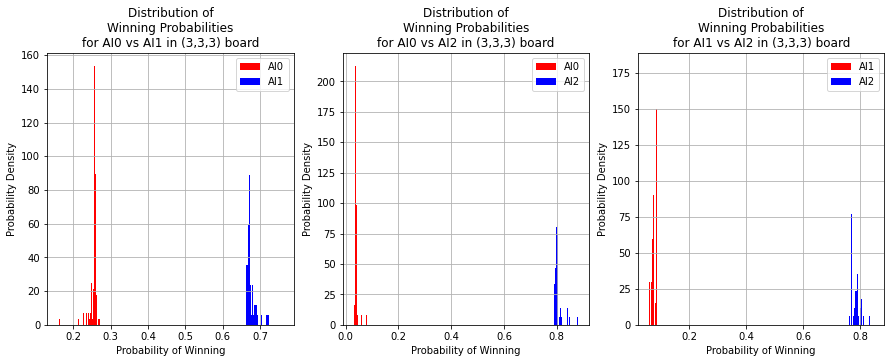

In [84]:
import matplotlib.pyplot as plt

#AI0 vs AI1
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1, 3, 1)  #first subplot
ax1.set_title('Distribution of\nWinning Probabilities\nfor AI0 vs AI1 in (3,3,3) board')
ax1.set_xlabel('Probability of Winning')
ax1.set_ylabel('Probability Density')
ax1.hist(p1_1, histtype = 'stepfilled', density = True, color = 'red', bins = 40, label = 'AI0');  #plot player 1
ax1.hist(p2_1, histtype = 'stepfilled', density = True, color = 'blue', bins = 60, label = 'AI1');  #plot player 2
ax1.grid(True)
ax1.legend();

#AI0 vs AI2
ax2 = fig.add_subplot(1, 3, 2) #second subplot
ax2.set_title('Distribution of\nWinning Probabilities\nfor AI0 vs AI2 in (3,3,3) board')
ax2.set_xlabel('Probability of Winning')
ax2.set_ylabel('Probability Density')
ax2.hist(p1_2, histtype = 'stepfilled', density = True, color = 'red', bins = 40, label = 'AI0');
ax2.hist(p2_2, histtype = 'stepfilled', density = True, color = 'blue', bins = 60, label = 'AI2');
ax2.grid(True)
ax2.legend();

#AI1 vs AI2
ax3 = fig.add_subplot(1, 3, 3)  #third subplot
ax3.set_title('Distribution of\nWinning Probabilities\nfor AI1 vs AI2 in (3,3,3) board')
ax3.set_xlabel('Probability of Winning')
ax3.set_ylabel('Probability Density')
ax3.hist(p1_3, histtype = 'stepfilled', density = True, color = 'red', bins = 50, label = 'AI1');  
ax3.hist(p2_3, histtype = 'stepfilled', density = True, color = 'blue', bins = 50, label = 'AI2');
ax3.grid(True)
ax3.legend();

In [85]:
#(4, 4, 4) and AI0 vs AI1
#comments are the same for all 9 scenarios and computations (comments are in the first computation code block)
p1_win4 = 0
p2_win4 = 0
tie4 = 0

p1_4 = []
p2_4 = []

for i in range(100):  #Generate 100 samples 
    for i in range(25):  #run 25 games
        val = execute_game(4, 4, 4, 1, 2)
        if val == 1:
            p1_win4 += 1
        elif val == 2:
            p2_win4 += 1
        elif val == 0:
            tie4 += 1
        clear_output(wait=True)  #Cleared the screen here to not see all of the tic tac toe executions. This can be commented out if you would like to see the executions  
    total_games = (p1_win4 + p2_win4 + tie4)
    p_p1win4 = p1_win4/total_games
    p_p2win4 = p2_win4/total_games
    p_tie4 = 1 - (p_p1win4 + p_p2win4)
    p1_4.append(p_p1win4)
    p2_4.append(p_p2win4)

p1m4 = statistics.mean(p1_4)
p1s4 = statistics.pstdev(p1_4)
print('Avg Win Probability AI0', p1m4, '; Standard deviation', p1s4)
p2m4 = statistics.mean(p2_4)
p2s4 = statistics.pstdev(p2_4)
print('Avg Win Probability AI1', p2m4, '; Standard deviation', p2s4)
cv1_4 = p1s4/p1m4
cv2_4 = p2s4/p2m4

print('CV AI0', cv1_4, '; CV AI1', cv2_4)


Avg Win Probability AI0 0.18153096919839748 ; Standard deviation 0.008779387175528551
Avg Win Probability AI1 0.5187222063580842 ; Standard deviation 0.015134257287443508
CV AI0 0.04836302705977099 ; CV AI1 0.029176035076076984


In [86]:
#(4, 4, 4) and AI0 vs AI2
#comments are the same for all 9 scenarios and computations (comments are in the first computation code block)
p1_win5 = 0
p2_win5 = 0
tie5 = 0

p1_5 = []
p2_5 = []

for i in range(100):  #Generate 100 samples 
    for i in range(25):  #run 25 games
        val = execute_game(4, 4, 4, 1, 3)
        if val == 1:
            p1_win5 += 1
        elif val == 2:
            p2_win5 += 1
        elif val == 0:
            tie5 += 1
        clear_output(wait=True)  #Cleared the screen here to not see all of the tic tac toe executions. This can be commented out if you would like to see the executions  
    total_games = (p1_win5 + p2_win5 + tie5)
    p_p1win5 = p1_win5/total_games
    p_p2win5 = p2_win5/total_games
    p_tie5 = 1 - (p_p1win5 + p_p2win5)
    p1_5.append(p_p1win5)
    p2_5.append(p_p2win5)

p1m5 = statistics.mean(p1_5)
p1s5 = statistics.pstdev(p1_5)
print('Avg Win Probability AI0', p1m5, '; Standard deviation', p1s5)
p2m5 = statistics.mean(p2_5)
p2s5 = statistics.pstdev(p2_5)
print('Avg Win Probability AI2', p2m5, '; Standard deviation', p2s5)
cv1_5 = p1s5/p1m5
cv2_5 = p2s5/p2m5

print('CV AI0', cv1_5, '; CV AI2', cv2_5)

Avg Win Probability AI0 0.0039986380042267185 ; Standard deviation 0.0015288303601173887
Avg Win Probability AI2 0.5802000697489252 ; Standard deviation 0.0230616409444126
CV AI0 0.38233777563794336 ; CV AI2 0.03974773900732596


In [89]:
#(4, 4, 4) and AI1 vs AI2
#comments are the same for all 9 scenarios and computations (comments are in the first computation code block)
p1_win6 = 0
p2_win6 = 0
tie6 = 0

p1_6 = []
p2_6 = []

for i in range(100):  #Generate 100 samples 
    for i in range(25):  #run 25 games
        val = execute_game(4, 4, 4, 2, 3)
        if val == 1:
            p1_win6 += 1
        elif val == 2:
            p2_win6 += 1
        elif val == 0:
            tie6 += 1
        clear_output(wait=True)  #Cleared the screen here to not see all of the tic tac toe executions. This can be commented out if you would like to see the executions  
    total_games = (p1_win6 + p2_win6 + tie6)
    p_p1win6 = p1_win6/total_games
    p_p2win6 = p2_win6/total_games
    p_tie6 = 1 - (p_p1win6 + p_p2win6)
    p1_6.append(p_p1win6)
    p2_6.append(p_p2win6)

p1m6 = statistics.mean(p1_6)
p1s6 = statistics.pstdev(p1_6)
print('Avg Win Probability AI1', p1m6, '; Standard deviation', p1s6)
p2m6 = statistics.mean(p2_6)
p2s6 = statistics.pstdev(p2_6)
print('Avg Win Probability AI2', p2m6, '; Standard deviation', p2s6)
cv1_6 = p1s6/p1m6
cv2_6 = p2s6/p2m6

print('CV AI1', cv1_6, '; CV AI2', cv2_6)

Avg Win Probability AI1 0.017004299172843015 ; Standard deviation 0.0032566329704918112
Avg Win Probability AI2 0.5556112076309349 ; Standard deviation 0.011631258425752132
CV AI1 0.1915182117998058 ; CV AI2 0.020934168112530595


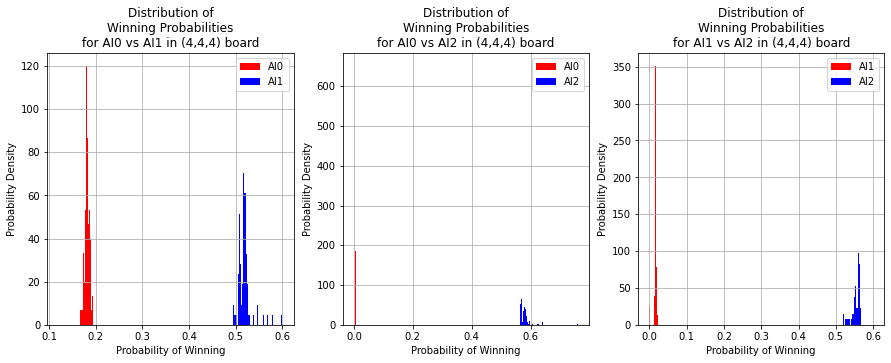

In [98]:
#AI0 vs AI1
#Comments are same as above plot code block
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('Distribution of\nWinning Probabilities\nfor AI0 vs AI1 in (4,4,4) board')
ax1.set_xlabel('Probability of Winning')
ax1.set_ylabel('Probability Density')
ax1.hist(p1_4, histtype = 'stepfilled', density = True, color = 'red', bins = 60, label = 'AI0');
ax1.hist(p2_4, histtype = 'stepfilled', density = True, color = 'blue', bins = 50, label = 'AI1');
ax1.grid(True)
ax1.legend();

#AI0 vs AI2
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title('Distribution of\nWinning Probabilities\nfor AI0 vs AI2 in (4,4,4) board')
ax2.set_xlabel('Probability of Winning')
ax2.set_ylabel('Probability Density')
ax2.hist(p1_5, histtype = 'stepfilled', density = True, color = 'red', bins = 20, label = 'AI0');
ax2.hist(p2_5, histtype = 'stepfilled', density = True, color = 'blue', bins = 60, label = 'AI2');
ax2.grid(True)
ax2.legend();

#AI1 vs AI2
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title('Distribution of\nWinning Probabilities\nfor AI1 vs AI2 in (4,4,4) board')
ax3.set_xlabel('Probability of Winning')
ax3.set_ylabel('Probability Density')
ax3.hist(p1_6, histtype = 'stepfilled', density = True, color = 'red', bins = 30, label = 'AI1');
ax3.hist(p2_6, histtype = 'stepfilled', density = True, color = 'blue', bins = 60, label = 'AI2');
ax3.grid(True)
ax3.legend();

In [99]:
#(4, 3, 3) and AI0 vs AI1
#comments are the same for all 9 scenarios and computations (comments are in the first computation code block)
p1_win7 = 0
p2_win7 = 0
tie7 = 0

p1_7 = []
p2_7 = []

for i in range(100):  #Generate 100 samples 
    for i in range(25):  #run 25 games
        val = execute_game(4, 3, 3, 1, 2)
        if val == 1:
            p1_win7 += 1
        elif val == 2:
            p2_win7 += 1
        elif val == 0:
            tie7 += 1
        clear_output(wait=True)  #Cleared the screen here to not see all of the tic tac toe executions. This can be commented out if you would like to see the executions  
    total_games = (p1_win7 + p2_win7 + tie7)
    p_p1win7 = p1_win7/total_games
    p_p2win7 = p2_win7/total_games
    p_tie7 = 1 - (p_p1win7 + p_p2win7)
    p1_7.append(p_p1win7)
    p2_7.append(p_p2win7)

p1m7 = statistics.mean(p1_7)
p1s7 = statistics.pstdev(p1_7)
print('Avg Win Probability AI0', p1m7, '; Standard deviation', p1s7)
p2m7 = statistics.mean(p2_7)
p2s7 = statistics.pstdev(p2_7)
print('Avg Win Probability AI1', p2m7, '; Standard deviation', p2s7)
cv1_7 = p1s7/p1m7
cv2_7 = p2s7/p2m7

print('CV AI0', cv1_7, '; CV AI1', cv2_7)

Avg Win Probability AI0 0.16771014199373774 ; Standard deviation 0.015264071629328782
Avg Win Probability AI1 0.826094572119031 ; Standard deviation 0.015845920392157535
CV AI0 0.09101460083373336 ; CV AI1 0.01918172679855632


In [101]:
#(4, 3, 3) and AI0 vs AI2
#comments are the same for all 9 scenarios and computations (comments are in the first computation code block)
p1_win8 = 0
p2_win8 = 0
tie8 = 0

p1_8 = []
p2_8 = []

for i in range(100):  #Generate 100 samples 
    for i in range(25):  #run 25 games
        val = execute_game(4, 3, 3, 1, 3)
        if val == 1:
            p1_win8 += 1
        elif val == 2:
            p2_win8 += 1
        elif val == 0:
            tie8 += 1
        clear_output(wait=True)  #Cleared the screen here to not see all of the tic tac toe executions. This can be commented out if you would like to see the executions  
    total_games = (p1_win8 + p2_win8 + tie8)
    p_p1win8 = p1_win8/total_games
    p_p2win8 = p2_win8/total_games
    p_tie8 = 1 - (p_p1win8 + p_p2win8)
    p1_8.append(p_p1win8)
    p2_8.append(p_p2win8)

p1m8 = statistics.mean(p1_8)
p1s8 = statistics.pstdev(p1_8)
print('Avg Win Probability AI0', p1m8, '; Standard deviation', p1s8)
p2m8 = statistics.mean(p2_8)
p2s8 = statistics.pstdev(p2_8)
print('Avg Win Probability AI2', p2m8, '; Standard deviation', p2s8)
cv1_8 = p1s8/p1m8
cv2_8 = p2s8/p2m8

print('CV AI0', cv1_8, '; CV AI2', cv2_8)

Avg Win Probability AI0 0.038440276830359735 ; Standard deviation 0.00586498320597292
Avg Win Probability AI2 0.9322295277432473 ; Standard deviation 0.0049349843482034686
CV AI0 0.1525739065786544 ; CV AI2 0.005293743870299988


In [102]:
#(4, 3, 3) and AI1 vs AI2
#comments are the same for all 9 scenarios and computations (comments are in the first computation code block)
p1_win9 = 0
p2_win9 = 0
tie9 = 0

p1_9 = []
p2_9 = []

for i in range(100):  #Generate 100 samples 
    for i in range(25):  #run 25 games
        val = execute_game(4, 3, 3, 2, 3)
        if val == 1:
            p1_win9 += 1
        elif val == 2:
            p2_win9 += 1
        elif val == 0:
            tie9 += 1
        clear_output(wait=True)  #Cleared the screen here to not see all of the tic tac toe executions. This can be commented out if you would like to see the executions  
    total_games = (p1_win9 + p2_win9 + tie9)
    p_p1win9 = p1_win9/total_games
    p_p2win9 = p2_win9/total_games
    p_tie9 = 1 - (p_p1win9 + p_p2win9)
    p1_9.append(p_p1win9)
    p2_9.append(p_p2win9)

p1m9 = statistics.mean(p1_9)
p1s9 = statistics.pstdev(p1_9)
print('Avg Win Probability AI1', p1m9, '; Standard deviation', p1s9)
p2m9 = statistics.mean(p2_9)
p2s9 = statistics.pstdev(p2_9)
print('Avg Win Probability AI2', p2m9, '; Standard deviation', p2s9)
cv1_9 = p1s9/p1m9
cv2_9 = p2s9/p2m9

print('CV AI1', cv1_9, '; CV AI2', cv2_9)

Avg Win Probability AI1 0.1408656308935643 ; Standard deviation 0.008915745314965992
Avg Win Probability AI2 0.8420277503714647 ; Standard deviation 0.01188361934798934
CV AI1 0.06329255233096978 ; CV AI2 0.014113097035990587


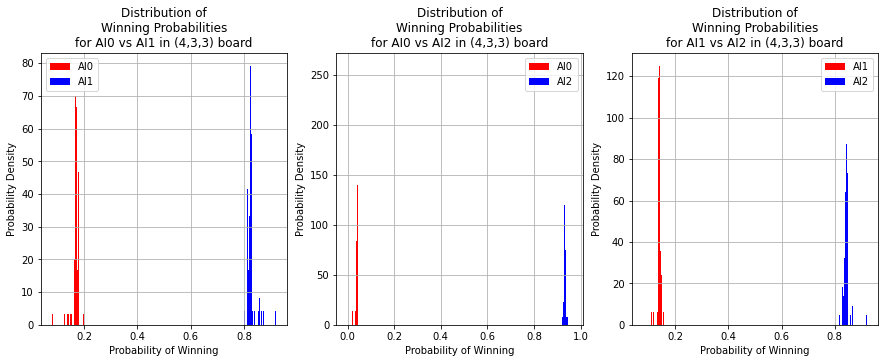

In [113]:
#AI0 vs AI1
#Comments are same as above plot code block

fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('Distribution of\nWinning Probabilities\nfor AI0 vs AI1 in (4,3,3) board')
ax1.set_xlabel('Probability of Winning')
ax1.set_ylabel('Probability Density')
ax1.hist(p1_7, histtype = 'stepfilled', density = True, color = 'red', bins = 40, label = 'AI0');
ax1.hist(p2_7, histtype = 'stepfilled', density = True, color = 'blue', bins = 50, label = 'AI1');
ax1.grid(True)
ax1.legend();

#AI0 vs AI2
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title('Distribution of\nWinning Probabilities\nfor AI0 vs AI2 in (4,3,3) board')
ax2.set_xlabel('Probability of Winning')
ax2.set_ylabel('Probability Density')
ax2.hist(p1_8, histtype = 'stepfilled', density = True, color = 'red', bins = 30, label = 'AI0');
ax2.hist(p2_8, histtype = 'stepfilled', density = True, color = 'blue', bins = 30, label = 'AI2');
ax2.grid(True)
ax2.legend();

#AI1 vs AI2
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title('Distribution of\nWinning Probabilities\nfor AI1 vs AI2 in (4,3,3) board')
ax3.set_xlabel('Probability of Winning')
ax3.set_ylabel('Probability Density')
ax3.hist(p1_9, histtype = 'stepfilled', density = True, color = 'red', bins = 50, label = 'AI1');
ax3.hist(p2_9, histtype = 'stepfilled', density = True, color = 'blue', bins = 50, label = 'AI2');
ax3.grid(True)
ax3.legend();

For some of the 9 scenarios above, the CV I computed for the first player was not in the 5% accuracy range. This was due to the limitations of the number of samples and simulations my computer was able to execute. I used 100 samples of size 25, as if I used more samples, my computer would shut down and not complete the executions. In addition, I used re-sampling method; however, I was still not able to run enough simulations to achieve 5% accuracy for both CV computations in each scenario. However, in each scenario, 2 CV computations for first player and the CV computations for the second player which would be AI1 in AI0 vs AI1, and AI2 in AI0 vs AI2 and AI1 vs AI2, is within the 5%; the value is less than 0.05. The standard deviation of the distribution was computed and the coefficient of variation was computed, to look at the computation relative to the mean.  